In [1]:
# IMPORT DEPENDENCIES

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from pathlib import Path

### Part 1: Prepare the Data

In [2]:
# IMPORT DATA FROM CSV FILE
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [4]:
# SPLIT DATA FRAME INTO FEATURES (X) AND TARGET (Y)
df2 = df.drop("MYOPIC", axis=1)

In [5]:
# STANDARDIZE THE DATA WITH SCALRE AND FIT TO TRAINING SET
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

### Part 2: Apply Dimensionality Reduction

In [6]:
# DIMENSIONALITY REDUCTION WIHT PCA
pca = PCA(n_components=0.90)
pca_transformed = pca.fit_transform(df2_scaled)
pca_transformed_df = pd.DataFrame(data = df2_scaled)
pca_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [7]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed)

In [8]:
df2["x"] = transformed_features[:,0]
df2["y"] = transformed_features[:,1]
df2["class"] = df["MYOPIC"]

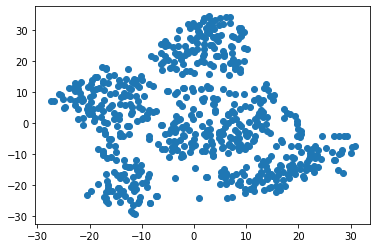

In [9]:
plt.scatter(df2["x"], df2["y"])
plt.show()

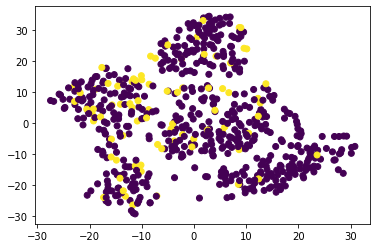

In [10]:
plt.scatter(df2["x"], df2["y"], c=df2["class"])
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

In [11]:
inertia = []
k = list(range(1, 11))

# INTERTIA OF RANGE OF K-VALUES
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(pca_transformed)
    inertia.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [12]:
# DATA FOR ELBOW PLOT OF INERTIA
inertia_plot = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(inertia_plot )
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825


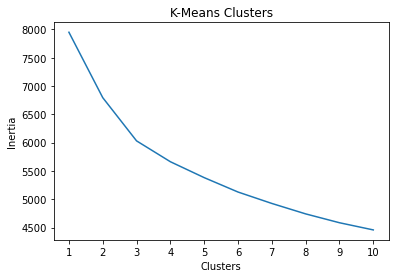

In [13]:
# ELBOW PLOT
plt.plot(df_elbow["k"], inertia_plot ["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Clusters")
plt.show()

### The elbow of the K-Means Clusters plot is at 3 clusters

### Recommendation: 
###### The elbow curve indicated that there were three clusters of patients. These should be analyzed separately and the findings of those analyses compared. 